In [93]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier

In [94]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\datascienceNumpy\\MachineLearning\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [95]:
data = pd.DataFrame(df)

In [96]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
data.dropna(inplace=True)

In [98]:
data["Contract"] = data["Contract"].map({
    'Month-to-month':0,
    'One year':1,
    'Two year':2
})

In [99]:

clean_binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in clean_binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

service_cols = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies', 'OnlineBackup']

for col in service_cols:
    data[col] = data[col].map({
        'Yes': 1, 
        'No': 0, 
        'No internet service': 0 
    })
data['MultipleLines'] = data['MultipleLines'].map({
    'No phone service':0,
    'No':0,
    'Yes':1
})

In [100]:
data['gender']= data['gender'].map({
    'Male':1,
    'Female':0
})

In [101]:
data = pd.get_dummies(data, columns=['PaymentMethod', 'InternetService'], drop_first=True)

In [102]:
data.drop(columns='customerID',inplace=True)

In [103]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# 2. Fill the new NaNs with 0 (since these are likely new customers with 0 charges)
data['TotalCharges'] = data['TotalCharges'].fillna(0)
data.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,0,1,29.85,29.85,0,False,True,False,False,False
1,1,0,0,0,34,1,0,1,0,1,...,1,0,56.95,1889.50,0,False,False,True,False,False
2,1,0,0,0,2,1,0,1,1,0,...,0,1,53.85,108.15,1,False,False,True,False,False
3,1,0,0,0,45,0,0,1,0,1,...,1,0,42.30,1840.75,0,False,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,0,1,70.70,151.65,1,False,True,False,True,False
5,0,0,0,0,8,1,1,0,0,1,...,0,1,99.65,820.50,1,False,True,False,True,False
6,1,0,0,1,22,1,1,0,1,0,...,0,1,89.10,1949.40,0,True,False,False,True,False
7,0,0,0,0,10,0,0,1,0,0,...,0,0,29.75,301.90,0,False,False,True,False,False
8,0,0,1,0,28,1,1,0,0,1,...,0,1,104.80,3046.05,1,False,True,False,True,False
9,1,0,0,1,62,1,0,1,1,0,...,1,0,56.15,3487.95,0,False,False,False,False,False


In [104]:
from sklearn.model_selection import train_test_split
xg = XGBClassifier()
X = data.drop(columns=['Churn'])
y = data['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

xg.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [105]:
y_pred = xg.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.7785663591199432


In [106]:
max_depth = [1,2,3,4,5,6,7,8,9]
min_child_weight= [1,2,3,4,5,6,7,8,9]

gamma=[1,2,3,4,5]
learning_rate = [0.01,0.05,0.08,0.10,0.012,0.20,0.25,0.30] 
n_estimators = [50,70,80,90,100,200,300,400,500]

param_grid = {
    'n_estimators': n_estimators,
               'gamma': gamma,
               'max_depth': max_depth,
              'learning_rate':learning_rate,
              'min_child_weight':min_child_weight
}


In [107]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# 1. Enable your RTX 4050 (GPU) -> This makes it 50x faster
xg = XGBClassifier(
 
    tree_method='hist', 
    device='cuda'  # <--- Crucial!
)

# 2. Use RandomizedSearchCV
# It finds the best parameters without checking every single one.
search = RandomizedSearchCV(
    xg, 
    param_grid, 
    n_iter=50,       # Only checks 50 smart combinations
    cv=5, 
    scoring='accuracy', 
    n_jobs=4, 
    verbose=2, 
    random_state=42
)

search.fit(X_train, y_train)

print("Done! Best Params:", search.best_params_)
print("Best Score:", search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Done! Best Params: {'n_estimators': 200, 'min_child_weight': 6, 'max_depth': 2, 'learning_rate': 0.05, 'gamma': 1}
Best Score: 0.803691404741679


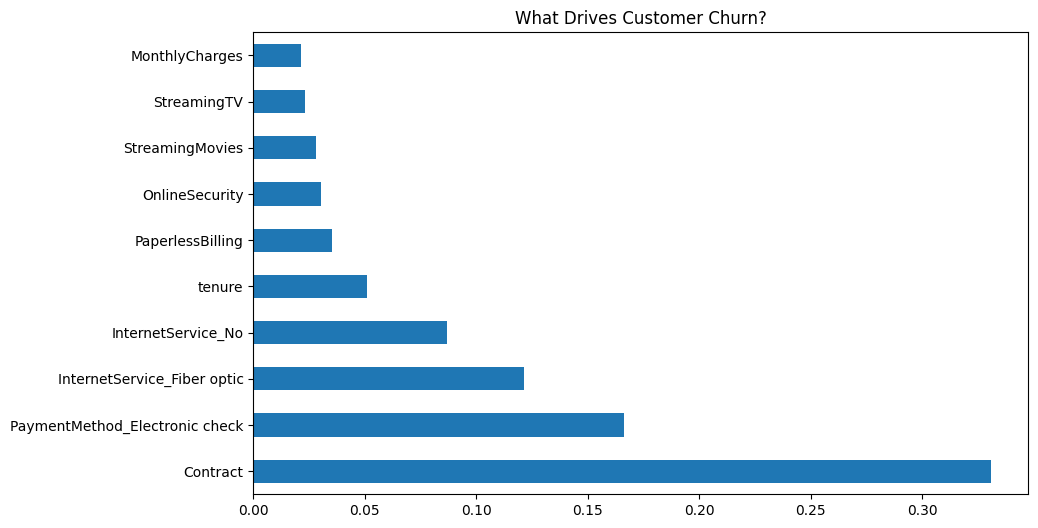

In [108]:
import matplotlib.pyplot as plt

# 1. Get the best model
best_model = search.best_estimator_

# 2. Create a DataFrame connecting Feature Name -> Importance Score
# (Make sure X_train is a DataFrame so we have column names)
feat_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

# 3. Plot the Top 10 most important features
plt.figure(figsize=(10,6))
feat_importances.nlargest(10).plot(kind='barh')
plt.title("What Drives Customer Churn?")
plt.show()